In [1]:
import pandas as pd

In [9]:
data = pd.read_csv("clean_sp100_data.csv")

In [10]:
data.head()

,Date,AAPL_Close,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Volume,AAPL_Daily Return,AAPL_Cumulative Return,AAPL_20d Volatility,AAPL_20d MA,...,GM_20d MA,ETN_Close,ETN_High,ETN_Low,ETN_Open,ETN_Volume,ETN_Daily Return,ETN_Cumulative Return,ETN_20d Volatility,ETN_20d MA
0,2024-10-07,220.663025,224.644495,220.304692,223.460005,39505400,NaN,NaN,NaN,NaN,...,NaN,330.357544,331.038737,325.974230,326.606043,1465900,NaN,NaN,NaN,NaN
1,2024-10-08,224.724121,224.933140,222.215791,223.260930,31855700,0.018404,1.018404,NaN,NaN,...,NaN,331.295380,333.437687,328.777949,332.203647,1136500,0.002839,1.002839,NaN,NaN
2,2024-10-09,228.476669,228.685703,223.788496,224.186637,33591100,0.016698,1.035410,NaN,NaN,...,NaN,333.931305,334.533502,330.446376,331.196682,1103600,0.007956,1.010818,NaN,NaN
3,2024-10-10,227.978989,228.436864,226.117656,226.724831,28183500,-0.002178,1.033154,NaN,NaN,...,NaN,332.638031,333.516652,328.442294,331.117685,1281000,-0.003873,1.006903,NaN,NaN
4,2024-10-11,226.495880,228.347264,226.286846,228.237773,31759200,-0.006505,1.026433,NaN,NaN,...,NaN,337.031219,337.613683,331.611294,332.697256,1162000,0.013207,1.020201,NaN,NaN


In [11]:
aapl_ret = data[['Date', 'AAPL_Daily Return']].dropna().reset_index(drop=True)


In [12]:
aapl_ret.head()


,Date,AAPL_Daily Return
0,2024-10-08,0.018404
1,2024-10-09,0.016698
2,2024-10-10,-0.002178
3,2024-10-11,-0.006505
4,2024-10-14,0.016480


## 1. RETURN ANALYSIS

In [13]:
aapl_ret['Date'] = pd.to_datetime(aapl_ret['Date'])


In [14]:
aapl_ret.dtypes


Date                 datetime64[ns]
AAPL_Daily Return           float64
dtype: object

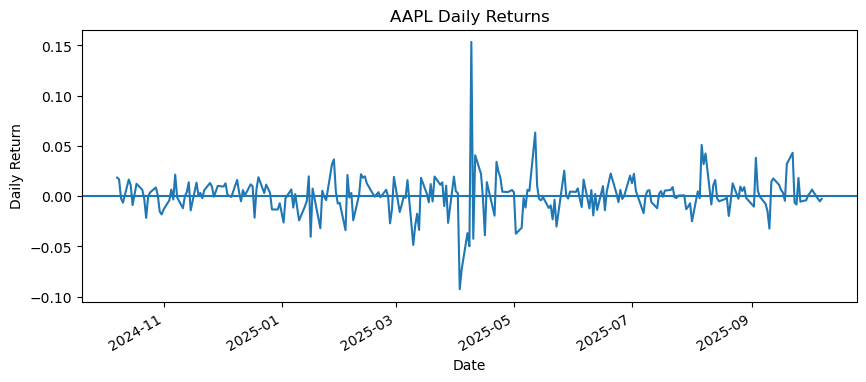

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(aapl_ret['Date'], aapl_ret['AAPL_Daily Return'])
ax.axhline(0)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.set_title('AAPL Daily Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')

fig.autofmt_xdate()
plt.show()


In [16]:
aapl_ret['AAPL_Daily Return'].describe()


count    250.000000
mean       0.000798
std        0.020374
min       -0.092456
25%       -0.006645
50%        0.001148
75%        0.009508
max        0.153289
Name: AAPL_Daily Return, dtype: float64

#### 1.1 STOCK-WISE RETURNS COMPARISON

In [17]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']


In [18]:
import pandas as pd

return_summary = []

for s in stocks:
    ret_col = f'{s}_Daily Return'
    tmp = data[[ret_col]].dropna()
    
    return_summary.append({
        'Stock': s,
        'Mean Daily Return': tmp[ret_col].mean(),
        'Return Std (Risk Proxy)': tmp[ret_col].std()
    })

return_summary = pd.DataFrame(return_summary)
return_summary


,Stock,Mean Daily Return,Return Std (Risk Proxy)
0,AAPL,0.000798,0.020374
1,MSFT,0.001122,0.015563
2,AMZN,0.001030,0.021125
3,GOOGL,0.001883,0.020252


While average daily returns across large-cap stocks are similar, volatility differs significantly. Stocks with lower return standard deviation exhibit greater stability.

#### 1.2 cummulative return 

In [19]:
# stocks for comparison (same as before)
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

# build dataframe for cumulative returns
cum_cols = ['Date'] + [f'{s}_Cumulative Return' for s in stocks]
cum_ret = data[cum_cols].dropna().reset_index(drop=True)

# ensure Date is datetime
cum_ret['Date'] = pd.to_datetime(cum_ret['Date'])

cum_ret.head()


,Date,AAPL_Cumulative Return,MSFT_Cumulative Return,AMZN_Cumulative Return,GOOGL_Cumulative Return
0,2024-10-08,1.018404,1.012624,1.010619,1.008590
1,2024-10-09,1.035410,1.019339,1.024170,0.993128
2,2024-10-10,1.033154,1.015383,1.032356,0.994478
3,2024-10-11,1.026433,1.016555,1.044358,1.001595
4,2024-10-14,1.043349,1.023441,1.037279,1.012149


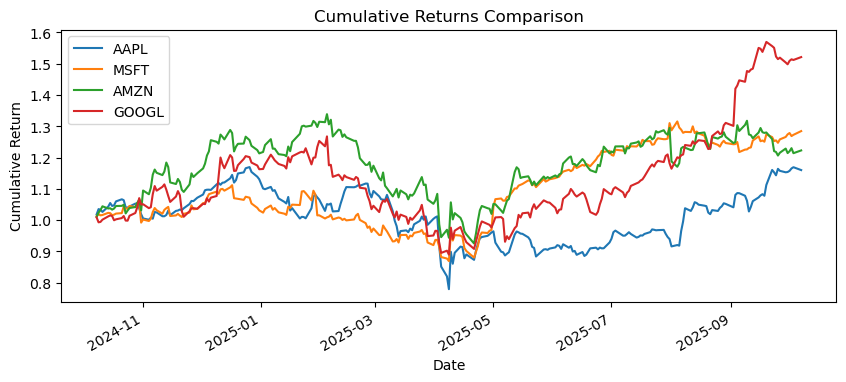

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10,4))

for s in stocks:
    ax.plot(
        cum_ret['Date'],
        cum_ret[f'{s}_Cumulative Return'],
        label=s
    )

# date formatting
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.set_title('Cumulative Returns Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.legend()

fig.autofmt_xdate()
plt.show()


In [21]:
final_cum_return = []

for s in stocks:
    final_cum_return.append({
        'Stock': s,
        'Final Cumulative Return': cum_ret[f'{s}_Cumulative Return'].iloc[-1]
    })

final_cum_return = pd.DataFrame(final_cum_return)
final_cum_return


,Stock,Final Cumulative Return
0,AAPL,1.160095
1,MSFT,1.284711
2,AMZN,1.222898
3,GOOGL,1.521223


## 2. Volatile Analysis

In [22]:
# same representative stocks
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

# volatility columns
vol_cols = ['Date'] + [f'{s}_20d Volatility' for s in stocks]

vol_df = data[vol_cols].dropna().reset_index(drop=True)

# ensure Date is datetime
vol_df['Date'] = pd.to_datetime(vol_df['Date'])

vol_df.head()


,Date,AAPL_20d Volatility,MSFT_20d Volatility,AMZN_20d Volatility,GOOGL_20d Volatility
0,2024-11-04,0.011810,0.015934,0.018395,0.012155
1,2024-11-05,0.011120,0.015756,0.018644,0.012058
2,2024-11-06,0.010370,0.016415,0.020022,0.014107
3,2024-11-07,0.011553,0.016594,0.020108,0.014743
4,2024-11-08,0.011463,0.016692,0.020334,0.015323


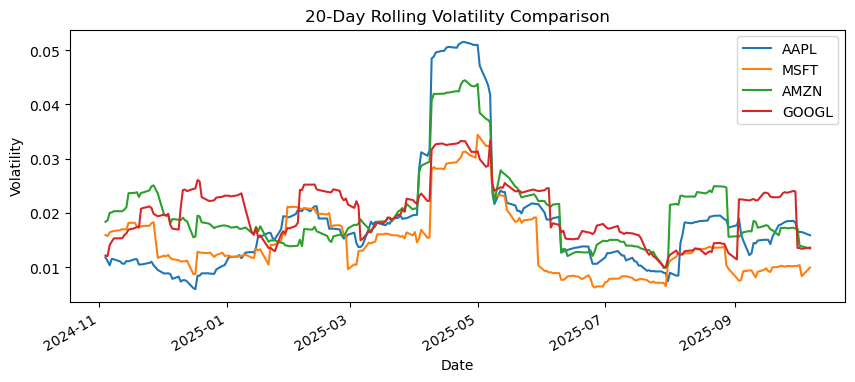

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10,4))

for s in stocks:
    ax.plot(
        vol_df['Date'],
        vol_df[f'{s}_20d Volatility'],
        label=s
    )

# date formatting
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.set_title('20-Day Rolling Volatility Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.legend()

fig.autofmt_xdate()
plt.show()


In [24]:
avg_vol = []

for s in stocks:
    avg_vol.append({
        'Stock': s,
        'Average 20D Volatility': vol_df[f'{s}_20d Volatility'].mean()
    })

avg_vol = pd.DataFrame(avg_vol).sort_values(
    'Average 20D Volatility'
)

avg_vol


,Stock,Average 20D Volatility
1,MSFT,0.014639
0,AAPL,0.018200
3,GOOGL,0.020110
2,AMZN,0.020467


## 3. Calm vs Tulberant Period

In [25]:
# find all volatility columns
vol_cols = [c for c in data.columns if '20d Volatility' in c]

# market-level volatility (average of all stocks)
data['Market_Volatility'] = data[vol_cols].mean(axis=1)


In [26]:
low_thresh = data['Market_Volatility'].quantile(0.30)
high_thresh = data['Market_Volatility'].quantile(0.70)

low_thresh, high_thresh


(0.014796139188471183, 0.018430848956107363)

In [27]:
def classify_regime(vol):
    if vol <= low_thresh:
        return 'Calm'
    elif vol >= high_thresh:
        return 'Turbulent'
    else:
        return 'Normal'

data['Market_Regime'] = data['Market_Volatility'].apply(classify_regime)


In [28]:
data['Market_Regime'].value_counts()


Market_Regime
Normal       111
Turbulent     70
Calm          70
Name: count, dtype: int64

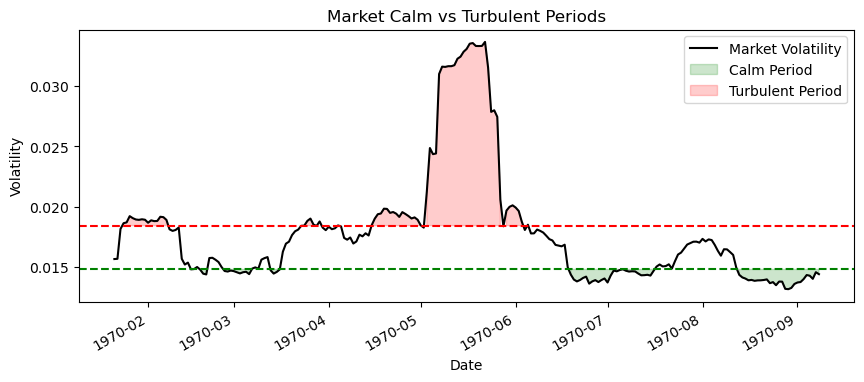

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10,4))

# main volatility line
ax.plot(
    data['Date'],
    data['Market_Volatility'],
    label='Market Volatility',
    color='black'
)

# calm region (below low threshold)
ax.fill_between(
    data['Date'],
    data['Market_Volatility'],
    low_thresh,
    where=(data['Market_Volatility'] <= low_thresh),
    color='green',
    alpha=0.2,
    label='Calm Period'
)

# turbulent region (above high threshold)
ax.fill_between(
    data['Date'],
    data['Market_Volatility'],
    high_thresh,
    where=(data['Market_Volatility'] >= high_thresh),
    color='red',
    alpha=0.2,
    label='Turbulent Period'
)

# threshold lines
ax.axhline(low_thresh, linestyle='--', color='green')
ax.axhline(high_thresh, linestyle='--', color='red')

# date formatting
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.set_title('Market Calm vs Turbulent Periods')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.legend()

fig.autofmt_xdate()
plt.show()


Calm periods are characterized by sustained low volatility, while turbulent regimes show sharp volatility spikes, highlighted through regime-based color coding.

## 4.CORRELATION & DIVERSIFICATION ANALYSIS

In [30]:
# representative stocks
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

# build returns dataframe
ret_cols = [f'{s}_Daily Return' for s in stocks]
ret_df = data[ret_cols].dropna().reset_index(drop=True)

ret_df.head()


,AAPL_Daily Return,MSFT_Daily Return,AMZN_Daily Return,GOOGL_Daily Return
0,0.018404,0.012624,0.010619,0.008590
1,0.016698,0.006631,0.013408,-0.015330
2,-0.002178,-0.003881,0.007993,0.001359
3,-0.006505,0.001154,0.011626,0.007157
4,0.016480,0.006774,-0.006779,0.010537


In [31]:
corr_matrix = ret_df.corr()
corr_matrix


,AAPL_Daily Return,MSFT_Daily Return,AMZN_Daily Return,GOOGL_Daily Return
AAPL_Daily Return,1.000000,0.518456,0.582052,0.484153
MSFT_Daily Return,0.518456,1.000000,0.666873,0.498643
AMZN_Daily Return,0.582052,0.666873,1.000000,0.597489
GOOGL_Daily Return,0.484153,0.498643,0.597489,1.000000


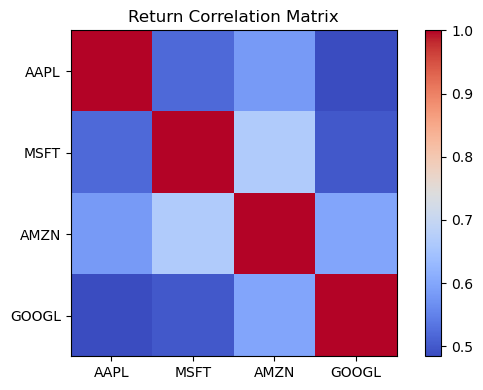

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(stocks)), stocks)
plt.yticks(range(len(stocks)), stocks)

plt.title('Return Correlation Matrix')
plt.tight_layout()
plt.show()


## 5.PORTFOLIO RISK ANALYSIS (WITHOUT ML)

In [33]:
# same representative stocks
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

# returns columns
ret_cols = [f'{s}_Daily Return' for s in stocks]

# portfolio daily return = average of individual returns
data['Portfolio_Daily_Return'] = data[ret_cols].mean(axis=1)


In [34]:
# 20-day rolling volatility for portfolio
data['Portfolio_20d_Volatility'] = (
    data['Portfolio_Daily_Return']
    .rolling(20)
    .std()
)


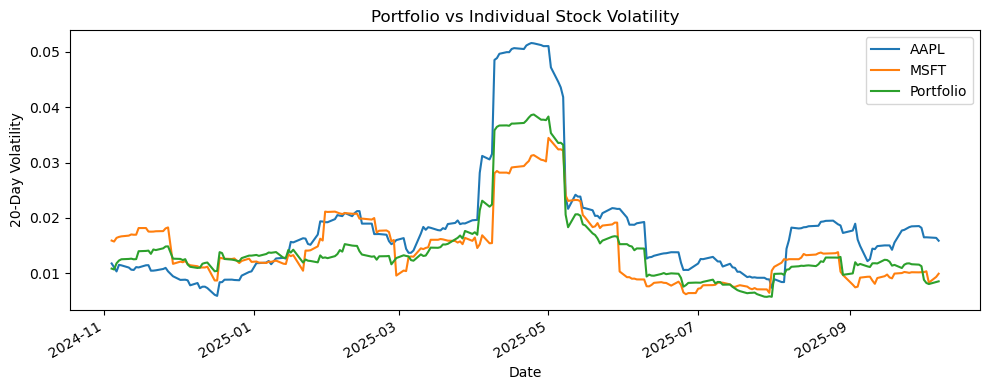

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# columns to plot
plot_cols = [
    'AAPL_20d Volatility',
    'MSFT_20d Volatility',
    'Portfolio_20d_Volatility'
]

# clean + sort data
plot_df = data[['Date'] + plot_cols].dropna().copy()
plot_df['Date'] = pd.to_datetime(plot_df['Date'])
plot_df = plot_df.sort_values('Date')

# plotting
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(plot_df['Date'], plot_df['AAPL_20d Volatility'], label='AAPL')
ax.plot(plot_df['Date'], plot_df['MSFT_20d Volatility'], label='MSFT')
ax.plot(plot_df['Date'], plot_df['Portfolio_20d_Volatility'], label='Portfolio')

# date formatting
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.set_title('Portfolio vs Individual Stock Volatility')
ax.set_xlabel('Date')
ax.set_ylabel('20-Day Volatility')
ax.legend()

fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [36]:
summary = []

for s in stocks:
    summary.append({
        'Asset': s,
        'Average 20D Volatility': data[f'{s}_20d Volatility'].mean()
    })

summary.append({
    'Asset': 'Portfolio',
    'Average 20D Volatility': data['Portfolio_20d_Volatility'].mean()
})

pd.DataFrame(summary)


,Asset,Average 20D Volatility
0,AAPL,0.018192
1,MSFT,0.014616
2,AMZN,0.020467
3,GOOGL,0.020083
4,Portfolio,0.014629


In [37]:
## now for all stocks

In [38]:
# extract real stock tickers using Close price columns
all_stocks = sorted([
    col.replace('_Close', '')
    for col in data.columns
    if col.endswith('_Close')
])

# quick sanity check
len(all_stocks), all_stocks[:96]


(96,
 ['AAPL',
  'ABBV',
  'ACN',
  'ADBE',
  'ADI',
  'ADP',
  'AMD',
  'AMGN',
  'AMT',
  'AMZN',
  'APD',
  'AXP',
  'BA',
  'BDX',
  'BKNG',
  'BLK',
  'BMY',
  'BRK-B',
  'C',
  'CAT',
  'CB',
  'CI',
  'CL',
  'COP',
  'CRM',
  'CSCO',
  'CSX',
  'CVS',
  'CVX',
  'DE',
  'DHR',
  'DUK',
  'ELV',
  'EQIX',
  'ETN',
  'GE',
  'GILD',
  'GM',
  'GOOG',
  'GOOGL',
  'GS',
  'HD',
  'HON',
  'IBM',
  'INTC',
  'INTU',
  'ISRG',
  'JNJ',
  'JPM',
  'KO',
  'LIN',
  'LMT',
  'LOW',
  'MCD',
  'MDLZ',
  'MDT',
  'META',
  'MMC',
  'MO',
  'MRK',
  'MS',
  'MSFT',
  'MU',
  'NEE',
  'NFLX',
  'NOW',
  'NVDA',
  'PEP',
  'PG',
  'PLD',
  'PM',
  'PNC',
  'PYPL',
  'QCOM',
  'REGN',
  'RTX',
  'SCHW',
  'SHW',
  'SO',
  'SPGI',
  'SYK',
  'T',
  'TGT',
  'TMO',
  'TSLA',
  'TXN',
  'UNH',
  'UNP',
  'USB',
  'V',
  'VRTX',
  'VZ',
  'WFC',
  'WMT',
  'XOM',
  'ZTS'])

In [39]:
summary_rows = []

for s in all_stocks:
    ret_col = f'{s}_Daily Return'
    vol_col = f'{s}_20d Volatility'
    
    if ret_col in data.columns and vol_col in data.columns:
        summary_rows.append({
            'Stock': s,
            'Avg_Daily_Return': data[ret_col].mean(),
            'Avg_20D_Volatility': data[vol_col].mean()
        })

stock_summary = pd.DataFrame(summary_rows)
stock_summary.head()


,Stock,Avg_Daily_Return,Avg_20D_Volatility
0,AAPL,0.000798,0.018192
1,ABBV,0.001054,0.016847
2,ACN,-0.001177,0.017161
3,ADBE,-0.001122,0.019817
4,ADI,0.000495,0.021966


In [40]:
most_stable = stock_summary.sort_values(
    'Avg_20D_Volatility'
).head(10)

most_risky = stock_summary.sort_values(
    'Avg_20D_Volatility',
    ascending=False
).head(10)

most_stable, most_risky


(    Stock  Avg_Daily_Return  Avg_20D_Volatility
 49     KO          0.000050            0.010537
 50    LIN          0.000160            0.010834
 31    DUK          0.000723            0.010934
 78     SO          0.000522            0.011099
 57    MMC         -0.000173            0.011103
 53    MCD          0.000112            0.011463
 68     PG         -0.000197            0.011571
 17  BRK-B          0.000477            0.011669
 47    JNJ          0.000853            0.011669
 5     ADP          0.000302            0.011729,
    Stock  Avg_Daily_Return  Avg_20D_Volatility
 84  TSLA          0.003412            0.042490
 44  INTC          0.002780            0.037752
 62    MU          0.003100            0.035753
 6    AMD          0.001442            0.030824
 66  NVDA          0.001988            0.029087
 86   UNH         -0.001311            0.028240
 74  REGN         -0.001805            0.023539
 85   TXN         -0.000071            0.023259
 82   TGT         -0.001545 

In [41]:
# all daily return columns
all_ret_cols = [f'{s}_Daily Return' for s in all_stocks if f'{s}_Daily Return' in data.columns]

# portfolio daily return (equal weight)
data['Portfolio_All_Daily_Return'] = data[all_ret_cols].mean(axis=1)

# portfolio volatility
data['Portfolio_All_20d_Volatility'] = (
    data['Portfolio_All_Daily_Return']
    .rolling(20)
    .std()
)


In [42]:
stock_summary.to_csv("stock_risk_summary.csv", index=False)

data[['Date', 'Portfolio_All_20d_Volatility']].dropna() \
    .to_csv("portfolio_volatility_all_stocks.csv", index=False)
